# Importing Libraries

In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

# Importing the Dataset

In [2]:
# 데이터 불러오기
path = "./data/"

data = pd.read_csv(path + "Preprocessing_data.csv")

In [3]:
data

,id,time,amount,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,precip_1h
0,1,2020-06-01 01:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
1,1,2020-06-01 02:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
2,1,2020-06-01 03:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
3,1,2020-06-01 04:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
4,1,2020-06-01 05:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240763,24,2021-07-23 20:00:00+09:00,7.581,30.2,64.0,22.7,45.0,2.2,0.0,16.1,41.0,6096.0,0.0
240764,24,2021-07-23 21:00:00+09:00,0.000,29.5,65.0,22.3,90.0,4.3,0.0,16.1,79.0,9144.0,0.0
240765,24,2021-07-23 22:00:00+09:00,0.000,28.8,62.0,20.9,0.0,3.6,0.0,20.9,76.0,9144.0,0.0
240766,24,2021-07-23 23:00:00+09:00,0.000,28.2,72.0,22.9,338.0,3.6,0.0,16.1,92.0,9144.0,0.0


In [4]:
id_index  = 1
id_df = data['id'] == id_index
id_df = data[id_df].reset_index(drop=True)
id_df = id_df.sort_values(['time'], ascending = [True])
id_df

,id,time,amount,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,precip_1h
0,1,2020-06-01 01:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
1,1,2020-06-01 02:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
2,1,2020-06-01 03:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
3,1,2020-06-01 04:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
4,1,2020-06-01 05:00:00+09:00,0.000,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,1,2021-07-23 20:00:00+09:00,10.408,31.7,60.0,23.0,180.0,7.5,0.0,16.1,84.0,9144.0,0.0
10028,1,2021-07-23 21:00:00+09:00,0.054,30.2,64.0,22.7,135.0,7.0,0.0,16.1,95.0,9144.0,0.0
10029,1,2021-07-23 22:00:00+09:00,0.000,28.8,63.0,21.3,113.0,4.8,0.0,19.3,76.0,9144.0,0.0
10030,1,2021-07-23 23:00:00+09:00,0.000,27.6,76.0,23.1,135.0,7.3,0.0,16.1,45.0,10363.0,0.0


# Feature Engineering

In [5]:
from datetime import datetime
from pytz import timezone
import pytz

korea = timezone('Asia/Seoul')
id_df.index =  pd.to_datetime(id_df['time'], unit='ns')
id_df.index = id_df.index.tz_convert(korea)
id_df['MonthOfYear'] = id_df.index.strftime('%m').astype(int)
id_df['DayOfYear'] = id_df.index.strftime('%j').astype(int)
id_df['WeekOfYear'] = id_df.index.strftime('%U').astype(int)
id_df['TimeOfDay(h)'] = id_df.index.hour
id_df['TimeOfDay(m)'] = id_df.index.hour*60 + id_df.index.minute
id_df['TimeOfDay(s)'] = id_df.index.hour*60*60 + id_df.index.minute*60 + id_df.index.second
id_df.drop(['id','time'], inplace=True, axis=1)
id_df.head()

,amount,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,precip_1h,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s)
time,,,,,,,,,,,,,,,,,
2020-06-01 01:00:00+09:00,0.0,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0,6,153,22,1,60,3600
2020-06-01 02:00:00+09:00,0.0,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0,6,153,22,2,120,7200
2020-06-01 03:00:00+09:00,0.0,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0,6,153,22,3,180,10800
2020-06-01 04:00:00+09:00,0.0,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0,6,153,22,4,240,14400
2020-06-01 05:00:00+09:00,0.0,16.6,97.0,16.2,270.0,11.7,0.0,4.8,91.0,884.0,0.0,6,153,22,5,300,18000


# Feature Visualisation

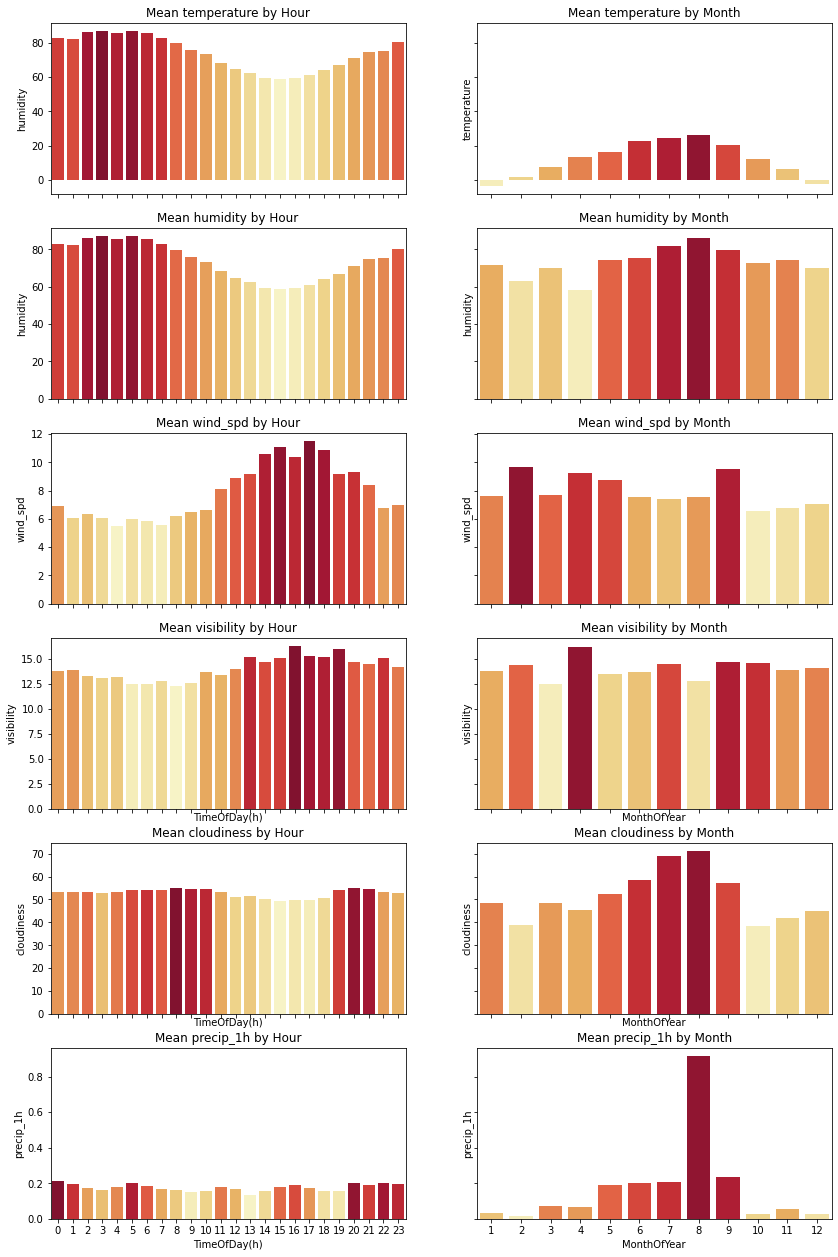

In [6]:
grouped_m=id_df.groupby('MonthOfYear').mean().reset_index()
grouped_w=id_df.groupby('WeekOfYear').mean().reset_index()
grouped_d=id_df.groupby('DayOfYear').mean().reset_index()
grouped_h=id_df.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, sharex='col', sharey='row', figsize=(14,22))

ax1.set_title('Mean temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean wind_spd by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['wind_spd'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='wind_spd', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean wind_spd by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['wind_spd'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='wind_spd', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean visibility by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['visibility'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='visibility', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean visibility by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['visibility'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='visibility', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

ax9.set_title('Mean cloudiness by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['cloudiness'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='cloudiness', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax9)

ax10.set_title('Mean cloudiness by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['cloudiness'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='cloudiness', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax10)

ax11.set_title('Mean precip_1h by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['precip_1h'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='precip_1h', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax11)

ax12.set_title('Mean precip_1h by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['precip_1h'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='precip_1h', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax12)

plt.show()

# Data Correlation

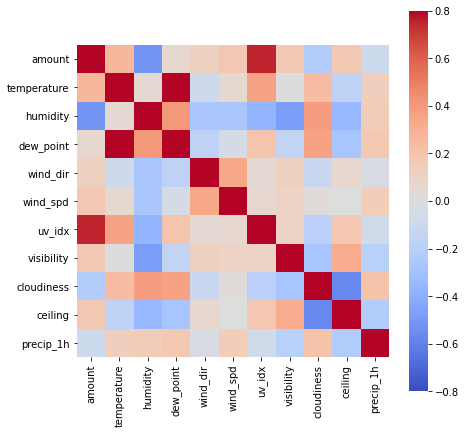

In [7]:
corrmat = id_df.drop(['MonthOfYear', 'DayOfYear', 'WeekOfYear', 'TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

In [8]:
# 종속 변수에 대하여 상관 계수가 높은 변수 제거
del id_df['uv_idx']

# Separating the Independent and Dependent Variables

- amount를 제외한 기록된 모든 기상 변수를 독립 변수에 포함

In [9]:
X = id_df[['temperature', 'humidity', 'wind_dir', 'wind_spd', 'visibility', 'cloudiness', 'precip_1h', 'DayOfYear', 'TimeOfDay(s)']]
y = id_df['amount']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Selection

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

c:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Features,r2 Score
0,"temperature, humidity, wind_dir, wind_spd, vis...",0.923259
1,"temperature, humidity, wind_dir, wind_spd, clo...",0.921723
2,"temperature, humidity, wind_spd, cloudiness, D...",0.920839
3,"temperature, humidity, cloudiness, DayOfYear, ...",0.921421
4,"temperature, cloudiness, DayOfYear, TimeOfDay(s)",0.913648


# Fitting the Regressor to the Key Features

In [12]:
best = feature_selection[feature_selection['r2 Score'] == feature_selection['r2 Score'].max()]['Features'].tolist()[0].split(',')
best_x = [j.strip() for j in best]

X_train_best = X_train[best_x]
X_test_best = X_test[best_x]
regressor.fit(X_train_best, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Cross Validation

In [13]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9242330343796649


# Predicting the Test Set

In [14]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9093299638349173
mse = 2550.7368891360734
r2 = 0.9091952062669117


# Visualising the Model

In [15]:
# pip install bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d

# Predicting for whole id_df
id_df['y_pred'] = regressor.predict(id_df[best_x])

output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Energy Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Energy',
           x_axis_type="datetime")
p.x_range = Range1d(id_df.index[-600], id_df.index[-1])
p.y_range = Range1d(-100, 800, bounds=(-100, 800))
p.line(id_df.index, id_df['amount'], legend='Observed Solar Energy', line_width=1)
p.line(id_df.index, id_df['y_pred'], legend='Predicted Solar Energy', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

# Prediction

In [16]:
# 데이터 불러오기
path = "./data/"

train = pd.read_csv(path + "Preprocessing_data.csv")
test = pd.read_csv(path + "forecast.csv")

data = pd.concat([train, test])

In [17]:
save_df = pd.DataFrame()

for i in range(1,25):
    id_index  = i
    id_df = data['id'] == id_index
    id_df = data[id_df].reset_index(drop=True)
    
    # feature Engineering
    korea = timezone('Asia/Seoul')
    id_df.index =  pd.to_datetime(id_df['time'], unit='ns')
    id_df.index = id_df.index.tz_convert(korea)
    id_df['DayOfYear'] = id_df.index.strftime('%j').astype(int)
    id_df['TimeOfDay(s)'] = id_df.index.hour*60*60 + id_df.index.minute*60 + id_df.index.second
    id_df.drop(['time'], inplace=True, axis=1)
    id_df = id_df.reset_index()
    
    # Separating the Independent and Dependent Variables
    X = id_df[['temperature', 'humidity', 'wind_dir', 'wind_spd', 'uv_idx', 'visibility', 'cloudiness', 'precip_1h', 'DayOfYear', 'TimeOfDay(s)']]
    y = id_df['amount']
    split_idx = id_df[id_df['time'] == test['time'][0]].index.tolist()[0]
    
    X_train, X_val, y_train, y_val = train_test_split(X[:split_idx], y[:split_idx], test_size=0.1, random_state=0)
    X_test, y_test = X[split_idx:], y[split_idx:]
    
    regressor = RandomForestRegressor(n_estimators = 100,
                                      min_samples_split = 4,
                                      min_samples_leaf = 2,
                                      n_jobs = -1) # 오류 시 n_jobs 제거 또는 값 변경
    regressor.fit(X_train, y_train)
    feature_importances = regressor.feature_importances_

    X_train_opt = X_train.copy()
    removed_columns = pd.DataFrame()
    models = []
    r2s_opt = []

    for k in range(0,5):
        least_important = np.argmin(feature_importances)
        removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
        regressor.fit(X_train_opt, y_train)
        feature_importances = regressor.feature_importances_
        accuracies = cross_val_score(estimator = regressor,
                                     X = X_train_opt,
                                     y = y_train, cv = 5,
                                     scoring = 'r2')
        r2s_opt = np.append(r2s_opt, accuracies.mean())
        models = np.append(models, ", ".join(list(X_train_opt)))

    feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
    best = feature_selection[feature_selection['r2 Score'] == feature_selection['r2 Score'].max()]['Features'].tolist()[0].split(',')
    best_x = [j.strip() for j in best]
    
    X_train_best = X_train[best_x]
    X_test_best = X_test[best_x]
    regressor.fit(X_train_best, y_train)
    
    # Cross Validation
    accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
    accuracy = accuracies.mean()
    print('----------' + str(i) + ' th----------')
    print('feature selection:', best_x)
    print('r2 = {}'.format(accuracy))
    print('')
    
    # Predicting the Test Set
    test_df = pd.DataFrame(id_df[split_idx:]['time'])
    test_df.insert(0, 'id', i)
    test_df['amount_pred'] = regressor.predict(X_test_best)
    
    if(i==1):
        save_df = test_df
        continue
    save_df = pd.concat([save_df, test_df])

----------1 th----------
feature selection: ['temperature', 'humidity', 'wind_dir', 'wind_spd', 'uv_idx', 'visibility', 'cloudiness', 'DayOfYear', 'TimeOfDay(s)']
r2 = 0.9311483338591297

----------2 th----------
feature selection: ['temperature', 'humidity', 'wind_dir', 'wind_spd', 'uv_idx', 'visibility', 'cloudiness', 'DayOfYear', 'TimeOfDay(s)']
r2 = 0.9010972676724679

----------3 th----------
feature selection: ['temperature', 'humidity', 'wind_dir', 'wind_spd', 'uv_idx', 'cloudiness', 'DayOfYear', 'TimeOfDay(s)']
r2 = 0.9257152122209289

----------4 th----------
feature selection: ['temperature', 'humidity', 'wind_dir', 'wind_spd', 'uv_idx', 'cloudiness', 'precip_1h', 'DayOfYear', 'TimeOfDay(s)']
r2 = 0.9277185684809084

----------5 th----------
feature selection: ['temperature', 'humidity', 'wind_dir', 'wind_spd', 'uv_idx', 'visibility', 'cloudiness', 'DayOfYear', 'TimeOfDay(s)']
r2 = 0.9246046010554221

----------6 th----------
feature selection: ['temperature', 'humidity', 'wi

In [18]:
# 태양광 발전량 예측 데이터 저장
save_df.to_csv(path+'Prediction.csv', index=False)

In [19]:
# 총 발전량 합 구하기(1~24번 발전소)
pred_date = '2021-08-XX 01:00:00'
dt = pd.date_range(pred_date, periods=24, freq='1H')
dt = pd.to_datetime(dt, unit='ns').tz_localize(timezone('Asia/Seoul'))

sum_amount = [save_df[save_df['time']==dt[i]]['amount_pred'].sum() for i in range(24)]
sum_amount = pd.DataFrame(sum_amount, columns = ['pred_amount'], index = [str(i)+'h' for i in range(1,25)])
sum_amount

,pred_amount
1h,0.332936
2h,0.332327
3h,0.331221
4h,0.328764
5h,0.332916
6h,17.428892
7h,505.989614
8h,2676.319076
9h,6145.374341
10h,9717.100924
